In [194]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from pyvis.network import Network
%matplotlib inline


## 1. Loading the dataset

In [36]:
df_book1=pd.read_csv("/Users/tarunayroy/Desktop/asoiaf/data/asoiaf-book1-edges.csv")
df_book2=pd.read_csv("/Users/tarunayroy/Desktop/asoiaf/data/asoiaf-book2-edges.csv")
df_book3=pd.read_csv("/Users/tarunayroy/Desktop/asoiaf/data/asoiaf-book3-edges.csv")
df_book4=pd.read_csv("/Users/tarunayroy/Desktop/asoiaf/data/asoiaf-book4-edges.csv")
df_book5=pd.read_csv("/Users/tarunayroy/Desktop/asoiaf/data/asoiaf-book5-edges.csv")

In [39]:
## Source and target are two nodes, that are connected by an edge. 
## The edge represents the number of times in the book two characters co-occur

In [40]:
df_book1.head(4)

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1


## 2. Creating network for Game of Thrones

In [43]:
G=nx.Graph()

In [44]:
df_books=[df_book1,df_book2,df_book3,df_book4,df_book5]

In [49]:
books_network=[]

In [52]:
for book in df_books:
    G_book = nx.Graph()
    for _,edge in book.iterrows():
        G_book.add_edge(edge['Source'],edge['Target'],weight=edge['weight'])
    books_network.append(G_book)

In [254]:
### We have all 5 books in a network

In [255]:
books_network

## 3.Visualizing the graphs in Pyvis

### Visualising the first book


In [197]:
net=Network(notebook=True)
net.from_nx(books_network[0])
net.show("book1.html")

## 4.1 Character importance using Degree Centrality

In [89]:
## Using degree centrality we find out who is the central figure in book1.
for i in range(len(books_network)):
    print(f"book{i+1}:")
    print("")
    top_5 = sorted(nx.degree_centrality(books_network[i]).items(),key=lambda item:item[1],reverse=True)[:5]
    for x in top_5:
        print(x[0])
    print("")

book1:

Eddard-Stark
Robert-Baratheon
Tyrion-Lannister
Catelyn-Stark
Jon-Snow

book2:

Tyrion-Lannister
Joffrey-Baratheon
Cersei-Lannister
Arya-Stark
Stannis-Baratheon

book3:

Tyrion-Lannister
Jon-Snow
Joffrey-Baratheon
Robb-Stark
Sansa-Stark

book4:

Jaime-Lannister
Cersei-Lannister
Brienne-of-Tarth
Tyrion-Lannister
Margaery-Tyrell

book5:

Jon-Snow
Daenerys-Targaryen
Stannis-Baratheon
Tyrion-Lannister
Theon-Greyjoy



## 4.2 Character evolution using degree centrality

In [188]:
## Stannis Baratheon we see you! We see Stannis Baratheon's importance creeping up in the books.
## Lets follow his importance throughout the books compared to our favorite charqacters: Eddard-Stark, Tyrion-Lannister
## Jon-Snow

In [117]:
characters=['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow','Stannis-Baratheon','Catelyn-Stark']

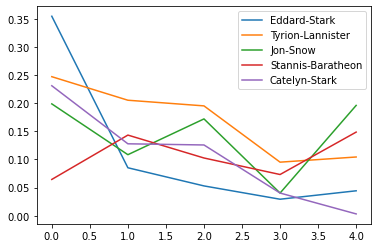

In [118]:
centrality = [nx.degree_centrality(book) for book in books_network]
degree_evolution=pd.DataFrame.from_records(centrality)
degree_evolution[characters].plot()
plt.show()

## 5. Character importance using betweenness Centrality

In [191]:
for i in range(len(books_network)):
    print(f"book{i+1}:")
    print("")
    top_5 = sorted(nx.betweenness_centrality(books_network[i]).items(),key=lambda item:item[1],reverse=True)[:5]
    for x in top_5:
        print(x[0])
    print("")

book1:

Eddard-Stark
Robert-Baratheon
Tyrion-Lannister
Jon-Snow
Catelyn-Stark

book2:

Arya-Stark
Jon-Snow
Robb-Stark
Tyrion-Lannister
Robert-Baratheon

book3:

Jon-Snow
Robert-Baratheon
Robb-Stark
Tyrion-Lannister
Joffrey-Baratheon

book4:

Stannis-Baratheon
Cersei-Lannister
Jaime-Lannister
Balon-Greyjoy
Sansa-Stark

book5:

Stannis-Baratheon
Daenerys-Targaryen
Jon-Snow
Tyrion-Lannister
Robert-Baratheon



## 5.2 Character evolution using betweenness centrality

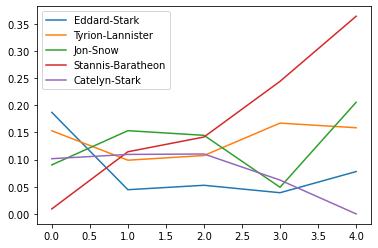

In [122]:
bw_centrality = [nx.betweenness_centrality(book,weight='weight') for book in books_network]
degree_evolution=pd.DataFrame.from_records(bw_centrality)
degree_evolution[characters].plot()
plt.show()

### We see Stannis Baratheon is significantly more important using weighted betweenness centrality. This could be a more accurate depiction because betweenness centrality helps find nodes which hold the network together

### -----------------------------------

## 6. Character interaction using Maximal Clique Analysis: Which characters belong to Stannis Baratheon's Clique in Book 5?

In [148]:
for i in range(len(books_network)):
    clique=list(nx.find_cliques(books_network[i]))
    stannis = [c for c in clique if "Stannis-Baratheon" in c]
    print(f"book{i+1}:\n")
    for s in stannis:
        print(s)
    print("")

book1:

['Eddard-Stark', 'Robert-Baratheon', 'Jon-Arryn', 'Lysa-Arryn', 'Stannis-Baratheon']
['Eddard-Stark', 'Robert-Baratheon', 'Jon-Arryn', 'Cersei-Lannister', 'Varys', 'Stannis-Baratheon', 'Pycelle']
['Eddard-Stark', 'Robert-Baratheon', 'Sansa-Stark', 'Jory-Cassel', 'Cersei-Lannister', 'Stannis-Baratheon']
['Eddard-Stark', 'Robert-Baratheon', 'Sansa-Stark', 'Joffrey-Baratheon', 'Cersei-Lannister', 'Stannis-Baratheon', 'Varys', 'Pycelle', 'Renly-Baratheon']
['Eddard-Stark', 'Robert-Baratheon', 'Tywin-Lannister', 'Joffrey-Baratheon', 'Cersei-Lannister', 'Varys', 'Pycelle', 'Stannis-Baratheon']

book2:

['Brienne-of-Tarth', 'Catelyn-Stark', 'Jaime-Lannister', 'Robert-Baratheon', 'Stannis-Baratheon', 'Renly-Baratheon']
['Pylos', 'Cressen', 'Davos-Seaworth', 'Stannis-Baratheon']
['Allard-Seaworth', 'Davos-Seaworth', 'Stannis-Baratheon']
['Patchface', 'Stannis-Baratheon', 'Cressen']
['Bryce-Caron', 'Stannis-Baratheon', 'Cortnay-Penrose', 'Renly-Baratheon']
['Steffon-Baratheon', 'Renly-Ba

## 6.1 Observations from Maximal Clique analysis 

In [262]:
## Its refreshing to see that the above identified communities follow closely with the story.
## Although each clique follows its own story line, I have tried to give overall summary here

In [263]:
## 1. From First book we can see that Stannis is mentioned the most with Robert,Eddard, Jon and Lysa. 
## Stannis was Robert's brother; Robert and Eddard were Jon's wards. Jon and lysa are married. 
## When Robert dies, Eddard wants Stannis to take the throne and hence he is mentioned a lot in conjunction to Eddard.

##2. In book 2 we see stannis interacting with a lot more characters, as the lannisters tries to device a plan to take his throne
## He also has his most loyal supported Davos Seaworth who creeps up in most of the identified cliques

##3. In book 3 - did anyone notice the relationship between Azor-Ahai and Stannis? ;) Stannis is considered Azor-Ahai
## and he is also introduced to Mellisandre a witch who helps him in the war to retake his rightful throne

##4. In book 4 - Stannis is at Castle Black! Hence we see a lot of his interaction with Jon-Snow. 
### Cersei in this book, tries to kill Stannis to avenge her father(who she believes was murdered by Stannis). Hence we see a lot of Cersei!

##5. In book 5- We again see increase in character interaction with stannis since now he is marching 
## on advice of Jon Snow


## Visualising Stannis Baratheon's neighbors throughout the books

In [231]:
## Book 1 
## If we zoom in we do see the maximal cliques defined above

In [247]:
nodes=list(books_network[0].neighbors('Stannis-Baratheon'))
nodes.append('Stannis-Baratheon')
net=Network(notebook=True)
net.from_nx(books_network[0].subgraph(nodes))
net.show("book1.html")

In [238]:
## Book 2
## If we zoom in we do see the maximal cliques defined above

In [248]:
nodes=list(books_network[1].neighbors('Stannis-Baratheon'))
nodes.append('Stannis-Baratheon')
net=Network(notebook=True)
net.from_nx(books_network[1].subgraph(nodes))
net.show("book2.html")

In [240]:
## Book 3
## If we zoom in we do see the maximal cliques defined above

In [249]:
nodes=list(books_network[2].neighbors('Stannis-Baratheon'))
nodes.append('Stannis-Baratheon')
net=Network(notebook=True)
net.from_nx(books_network[2].subgraph(nodes))
net.show("book3.html")

In [243]:
## Book 4
## If we zoom in we do see the maximal cliques defined above

In [251]:
nodes=list(books_network[3].neighbors('Stannis-Baratheon'))
nodes.append('Stannis-Baratheon')
net=Network(notebook=True)
net.from_nx(books_network[3].subgraph(nodes))
net.show("book4.html")

In [252]:
## Book5

In [253]:
nodes=list(books_network[4].neighbors('Stannis-Baratheon'))
nodes.append('Stannis-Baratheon')
net=Network(notebook=True)
net.from_nx(books_network[4].subgraph(nodes))
net.show("book4.html")